In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

filename = "/kaggle/input/housing-price-prediction/Housing.csv"
df = pd.read_csv(filename)
display(df.sort_values(by='area',ascending=False))
display(df.sort_values(by='area',ascending=True))
df.head()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv
/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
449,3150000,1650,3,1,2,no,no,yes,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
527,2275000,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
413,3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [121]:
## simple univariate linear regression

df_1=df[['price','area','bedrooms']]
df_1.head(5)
## add price in millions

df_1['prices_m']=df_1['price']/1000000
# df['prices_m'].map('{:.2f}M'.format)
## create price per sqft - feature engineering
df_1['price_per_area']=df['price']/df['area']

df_1.head(5)
display(df_1.sort_values(by='price_per_area',ascending=False))

,price,area,bedrooms,prices_m,price_per_area
13,9240000,3500,4,9.240,2640.000000
271,4340000,1905,5,4.340,2278.215223
20,8750000,4320,3,8.750,2025.462963
282,4270000,2175,3,4.270,1963.218391
302,4200000,2145,3,4.200,1958.041958
...,...,...,...,...,...
473,3003000,8050,2,3.003,373.043478
401,3500000,9500,3,3.500,368.421053
452,3150000,9000,3,3.150,350.000000
520,2450000,7700,2,2.450,318.181818


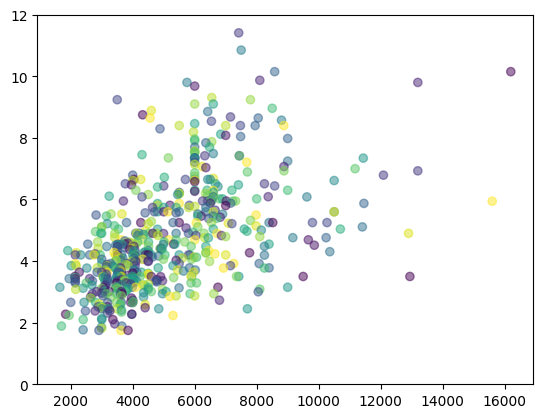

In [122]:
colors = np.random.randint(20, size=(545))
plt.scatter(df_1['area'],df_1['prices_m'],alpha=0.5,c=colors)
# plt.xlim(0, 10000)  # Set x-axis limits
plt.ylim(0, 12)  # Set y-axis limits
plt.ticklabel_format(style='plain')    # to prevent scientific notation.


In [123]:
## feature scaling
scaler=StandardScaler()
scaled_data=df_1.copy()
print('exisitng data')
print(scaled_data.head(5))
scaled_data=scaler.fit_transform(scaled_data)
new_df=pd.DataFrame(scaled_data, columns=df_1.columns)
print('scaled data')
print(new_df.head(5))

exisitng data
      price  area  bedrooms  prices_m  price_per_area
0  13300000  7420         4    13.300     1792.452830
1  12250000  8960         4    12.250     1367.187500
2  12250000  9960         3    12.250     1229.919679
3  12215000  7500         4    12.215     1628.666667
4  11410000  7420         4    11.410     1537.735849
scaled data
      price      area  bedrooms  prices_m  price_per_area
0  4.566365  1.046726  1.403419  4.566365        2.308152
1  4.004484  1.757010  1.403419  4.004484        1.079838
2  4.004484  2.218232  0.047278  4.004484        0.683361
3  3.985755  1.083624  1.403419  3.985755        1.835081
4  3.554979  1.046726  1.403419  3.554979        1.572441


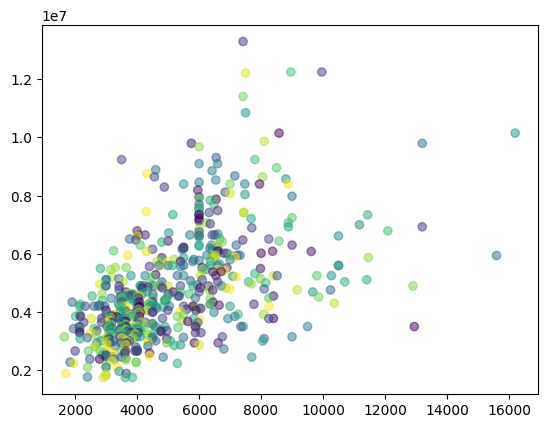

In [124]:
## plot scaled data

colors = np.random.randint(20, size=(545))
plt.scatter(df_1['area'],df_1['price'],alpha=0.5,c=colors)
plt.autoscale()

In [125]:
X_train,X_test,Y_train,Y_test=train_test_split(new_df['area'].values.reshape(-1,1),new_df['price'],test_size=0.2)

In [126]:
model=LinearRegression()
## train the model
model.fit(X_train,Y_train)

LinearRegression()

In [127]:
## prediction
Y_pred=model.predict(X_test)
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)

0.5703958092554599
0.27535696563402035


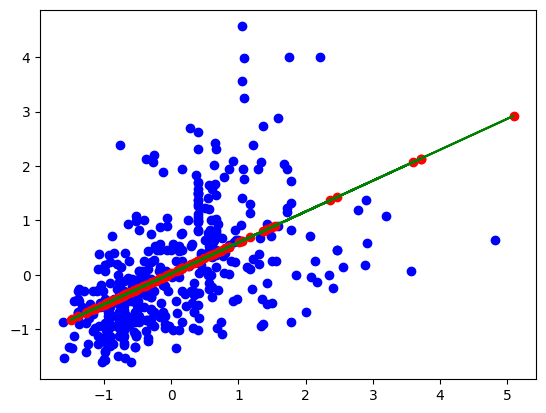

In [128]:
plt.scatter(X_train, Y_train, color='blue', label='Original Data')

# Plot predicted data points
plt.scatter(X_test, Y_pred, color='red', label='Predicted Data')
plt.plot(X_test, Y_pred, color='green', label='Regression Line')


In [129]:
## using gradient descent

model = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant', penalty=None)
model.fit(X_train, Y_train)
## output parameters
print(model.intercept_)
print(model.coef_)

[0.02015925]
[0.62275653]


In [130]:
Y_pred=model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
# Calculate the R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
# Print the MSE and R2 score
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.5908950625079561
R-squared (R2) Score: 0.24931427591209665


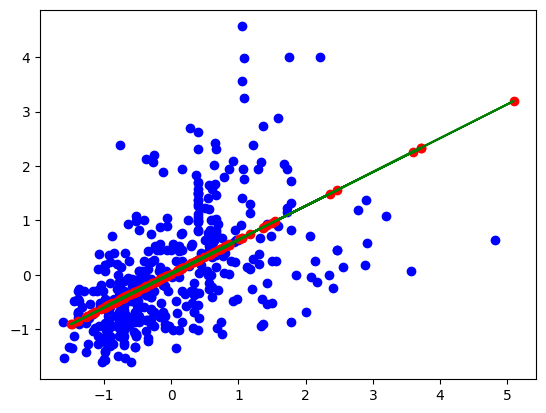

In [131]:
plt.scatter(X_train, Y_train, color='blue', label='Original Data')

# Plot predicted data points
plt.scatter(X_test, Y_pred, color='red', label='Predicted Data')
plt.plot(X_test, Y_pred, color='green', label='Regression Line')

In [132]:
Y_test.describe()

count    109.000000
mean      -0.075928
std        0.891307
min       -1.614327
25%       -0.677858
50%       -0.172165
75%        0.333528
max        2.880722
Name: price, dtype: float64

In [133]:
Y_test_df= pd.DataFrame(data=Y_test)
display(Y_test_df)
Y_pred_df= pd.DataFrame(data=Y_pred)
display(Y_pred_df)

# output_df=pd.concat([Y_test_df, Y_pred_df],axis=1)
# display(output_df)

,price
375,-0.602941
306,-0.322000
386,-0.659129
244,-0.115977
128,0.591993
...,...
82,0.989056
135,0.539551
319,-0.378188
214,0.052587


,0
0,0.252660
1,-0.069037
2,-0.353395
3,0.068833
4,0.120534
...,...
104,1.556682
105,0.264149
106,-0.597540
107,-0.209780


In [59]:
## multiple variable regression

df_2=df[['price','area','bedrooms','bathrooms']
df_2.head(5)

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [60]:
## scale data
scaled_data=scaler.fit_transform(df_2)
new_df=pd.DataFrame(scaled_data, columns=df_2.columns)
new_df.head()

,price,area,bedrooms,bathrooms
0,4.566365,1.046726,1.403419,1.421812
1,4.004484,1.757010,1.403419,5.405809
2,4.004484,2.218232,0.047278,1.421812
3,3.985755,1.083624,1.403419,1.421812
4,3.554979,1.046726,1.403419,-0.570187


In [65]:
new_df_features=new_df.loc[:, new_df.columns != 'price']
new_df_target=new_df.loc[:, new_df.columns == 'price']

X_train,X_test,Y_train,Y_test=train_test_split(new_df_features,new_df_target,test_size=0.2)

In [66]:
model = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant', penalty=None)
model.fit(X_train, Y_train)
## output parameters
print(model.intercept_)
print(model.coef_)

[0.05519673]
[0.42886983 0.15366888 0.39591797]


In [69]:
Y_pred=model.predict(X_test)
print(Y_test[:5])
mse = mean_squared_error(Y_test, Y_pred)
print(mse)


        price
71   1.063973
412 -0.715317
84   0.932867
489 -1.033716
220  0.015128
0.5030540228584066
